In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [385]:
used_cars=pd.read_csv("/content/used_cars.csv")

In [386]:
used_cars.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [387]:
used_cars.shape

(4009, 12)

In [388]:
used_cars.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [389]:
used_cars.nunique()

,0
brand,57
model,1898
model_year,34
milage,2818
fuel_type,7
engine,1146
transmission,62
ext_col,319
int_col,156
accident,2


In [390]:
used_cars.isnull().sum().sort_values(ascending=False)

,0
clean_title,596
fuel_type,170
accident,113
brand,0
milage,0
model_year,0
model,0
engine,0
ext_col,0
transmission,0


In [391]:
(used_cars.isnull().sum() /len(used_cars)*100).sort_values(ascending=False)

,0
clean_title,14.866550
fuel_type,4.240459
accident,2.818658
brand,0.000000
milage,0.000000
model_year,0.000000
model,0.000000
engine,0.000000
ext_col,0.000000
transmission,0.000000


In [392]:
used_cars.drop('clean_title', axis=1, inplace=True)

I dropped the clean_title feature as it has only 1 unique values.. so it doesn't matter much in price prediction

### Imputing/Dropping missing values
I am deciding to impute the missing values in fuel_type column.

As we noticed, only <5% of the data points are missing in this particular feature, and fuel_type appears to be significantly important feature to predict price.

In [393]:
used_cars['fuel_type'].isnull().sum()

np.int64(170)

In [394]:
used_cars['fuel_type'].value_counts(dropna=False)

,count
fuel_type,
Gasoline,3309
Hybrid,194
NaN,170
E85 Flex Fuel,139
Diesel,116
–,45
Plug-In Hybrid,34
not supported,2


In [395]:
(used_cars['fuel_type'].value_counts(dropna=False)/len(used_cars)*100).sort_values(ascending=False)

,count
fuel_type,
Gasoline,82.539287
Hybrid,4.839112
NaN,4.240459
E85 Flex Fuel,3.467199
Diesel,2.893490
–,1.122474
Plug-In Hybrid,0.848092
not supported,0.049888


In [396]:
used_cars['fuel_type']=used_cars['fuel_type'].replace(['–', 'not supported'], np.nan)

In [397]:
used_cars['fuel_type'].value_counts(dropna=False)

,count
fuel_type,
Gasoline,3309
NaN,217
Hybrid,194
E85 Flex Fuel,139
Diesel,116
Plug-In Hybrid,34


In [398]:
used_cars['fuel_type']=used_cars['fuel_type'].fillna(used_cars['fuel_type'].mode()[0])

In [399]:
used_cars['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Diesel', 'Plug-In Hybrid'],
      dtype=object)

In [400]:
used_cars['fuel_type'].value_counts(dropna=False)

,count
fuel_type,
Gasoline,3526
Hybrid,194
E85 Flex Fuel,139
Diesel,116
Plug-In Hybrid,34


In [401]:
used_cars['fuel_type'].isnull().sum()

np.int64(0)

The missing values in fuel type column successfully imputes using the mode metric.

In [402]:
used_cars['accident'].isnull().sum()

np.int64(113)

In [403]:
used_cars['accident'].fillna(used_cars['accident'].mode()[0], inplace=True)

/tmp/ipython-input-169959327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  used_cars['accident'].fillna(used_cars['accident'].mode()[0], inplace=True)


In [404]:
used_cars['accident'].isnull().sum()

np.int64(0)

In [405]:
used_cars.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,0


Now since all the columns which had missing values has been handled... we move to our next step which is handling variation of same value

In [406]:
cat_cols=used_cars.select_dtypes(include='object').columns
print(cat_cols)

Index(['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission',
       'ext_col', 'int_col', 'accident', 'price'],
      dtype='object')


In [407]:
for column in cat_cols:
  print(column)
  print(used_cars[column].unique())

brand
['Ford' 'Hyundai' 'Lexus' 'INFINITI' 'Audi' 'Acura' 'BMW' 'Tesla' 'Land'
 'Aston' 'Toyota' 'Lincoln' 'Jaguar' 'Mercedes-Benz' 'Dodge' 'Nissan'
 'Genesis' 'Chevrolet' 'Kia' 'Jeep' 'Bentley' 'Honda' 'Lucid' 'MINI'
 'Porsche' 'Hummer' 'Chrysler' 'Volvo' 'Cadillac' 'Lamborghini' 'Maserati'
 'Volkswagen' 'Subaru' 'Rivian' 'GMC' 'RAM' 'Alfa' 'Ferrari' 'Scion'
 'Mitsubishi' 'Mazda' 'Saturn' 'Bugatti' 'Polestar' 'Rolls-Royce'
 'McLaren' 'Buick' 'Lotus' 'Pontiac' 'FIAT' 'Karma' 'Saab' 'Mercury'
 'Plymouth' 'smart' 'Maybach' 'Suzuki']
model
['Utility Police Interceptor Base' 'Palisade SEL' 'RX 350 RX 350' ...
 'Martin DB7 Vantage Volante' 'Impala 2LZ' 'Taycan']
milage
['51,000 mi.' '34,742 mi.' '22,372 mi.' ... '53,705 mi.' '714 mi.'
 '2,116 mi.']
fuel_type
['E85 Flex Fuel' 'Gasoline' 'Hybrid' 'Diesel' 'Plug-In Hybrid']
engine
['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability'
 '3.8L V6 24V GDI DOHC' '3.5 Liter DOHC' ...
 '136.0HP 1.8L 4 Cylinder Engine Gasoline Fuel'
 '270.0HP 2.0L 4

Talking about the brand feature,  we don't see any variations of same value. Thus the brand feature is safe.
The next one model  and milage feature. which have 1898 and 2818 unique values respectively. We'll only remove leading/trailing spaces, fix weird capitalization in model  and milage column. and then we see  if the number of unique values are decreased.

In [408]:
used_cars['model']=used_cars['model'].astype(str).str.strip().str.title()

In [409]:
used_cars['model'].nunique()

1894

In [410]:
used_cars['milage']=used_cars['milage'].astype(str).str.strip().str.title()

In [411]:
used_cars['milage'].nunique()

2818

Didn't help much. Next column is fuel_type which is already been handled. It just need encoding... which will be done for all categorical features in next step.(Machine learning models do not “understand” categories.
We convert categories to numbers so models can understand patterns inside them)

The engine feature is a gold mine. It contains text describing horsepower, displacement, cylinde count.. all these features would affect the pricing. Thus we will extract important information.

In [412]:
used_cars.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'price'],
      dtype='object')

In [413]:
used_cars['horsepower']=used_cars['engine'].str.extract(r'(\d+\.?\d*)HP', expand=False).astype(float)

In [414]:
used_cars['cylinder']=used_cars['engine'].str.extract(r'(\d+) Cylinder', expand=False).astype('Int64')

In [415]:
used_cars['engine_size']=used_cars['engine'].str.extract(r'(\d+\.?\d*)L', expand=False).astype(float)

In [416]:
used_cars['horsepower'].head()

,horsepower
0,300.0
1,NaN
2,NaN
3,354.0
4,NaN


In [417]:
used_cars['cylinder'].head()

,cylinder
0,6
1,<NA>
2,<NA>
3,6
4,<NA>


In [418]:
used_cars['engine_size'].head()

,engine_size
0,3.7
1,3.8
2,NaN
3,3.5
4,2.0


In [419]:
used_cars.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price,horsepower,cylinder,engine_size
0,Ford,Utility Police Interceptor Base,2013,"51,000 Mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,"$10,300",300.0,6,3.7
1,Hyundai,Palisade Sel,2021,"34,742 Mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,"$38,005",NaN,<NA>,3.8
2,Lexus,Rx 350 Rx 350,2022,"22,372 Mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,"$54,598",NaN,<NA>,NaN
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 Mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,"$15,500",354.0,6,3.5
4,Audi,Q3 45 S Line Premium Plus,2021,"9,835 Mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,"$34,999",NaN,<NA>,2.0


In [420]:
# just shifting the target column to the end of the dataframe 😅(looks nice this way)
target='price'
cols=[c for c in used_cars.columns if c!=target]+[target]
used_cars=used_cars[cols]

In [421]:
used_cars.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,horsepower,cylinder,engine_size,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 Mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,300.0,6,3.7,"$10,300"
1,Hyundai,Palisade Sel,2021,"34,742 Mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,NaN,<NA>,3.8,"$38,005"
2,Lexus,Rx 350 Rx 350,2022,"22,372 Mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,<NA>,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 Mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,354.0,6,3.5,"$15,500"
4,Audi,Q3 45 S Line Premium Plus,2021,"9,835 Mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,<NA>,2.0,"$34,999"


Coming on to the transmission feature...it's a bulky feature and we don't need such detailing. So, we will rearrange the values of this column in 3 categories- Automatic, Manual, CVT(Continuous Variable Tranmission).

In [422]:
def categorizing_transmission(x):
  if 'auto' in x or 'Auto' in x or 'A/T' in x or 'Automatic' in x or 'DCT' in x:
    return 'Automatic'
  elif 'manual' in x or 'M/T'in x or 'Manual' in x:
    return 'Manual'
  elif 'CVT' in x or 'cvt' in x:
    return 'CVT'
  else:
    return np.nan

used_cars['transmission']=used_cars['transmission'].apply(categorizing_transmission)

used_cars['transmission'].fillna(used_cars['transmission'].mode()[0], inplace=True)

/tmp/ipython-input-3131671422.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  used_cars['transmission'].fillna(used_cars['transmission'].mode()[0], inplace=True)


In [423]:
used_cars['transmission'].isnull().sum()

np.int64(0)

In [424]:
used_cars['transmission'].value_counts(dropna=False)

,count
transmission,
Automatic,3574
Manual,372
CVT,63


In [425]:
used_cars['transmission'].unique()

array(['Automatic', 'Manual', 'CVT'], dtype=object)

Next feature to be handled is ext_color... which is probably the most messiest feature in car datasets. Multiple fancy names for basically thr same color. thus for simplicity.. we will categorise the hundreds and thousands of values in  8-10 basic colors.

In [426]:
def categorizing_color(x):
  x=str(x).title()
  if any (word in x for word in ['Black', 'Noir', 'Obsidian', 'Raven', 'Ebony', 'Ultra', 'Onyx', 'Phantom', 'Carbon', 'Magnetite', 'Jet', 'Santorin', 'Diamond', 'Beluga', 'Nero', 'Majestic', 'Storm', 'Shadow', 'Arctic', 'Tempest']):
    return 'Black'
  elif any (word in x for word in ['White', 'Pearl', 'Platinum', 'Frost', 'Crystal', 'Alpine', 'Glacier', 'Lunar', 'Oxford', 'Super', 'Matte', 'Diamond', 'Arctic', 'Snow', 'Pristine', 'Wind', 'Star']):
    return 'White'
  elif any (word in x for word in ['Gray', 'Graphite', 'Magnet', 'Chronos', 'Daytona', 'Sting', 'Granite', 'Silver-grey', 'Typhoon', 'Quartzite', 'Tempest', 'Nimbus', 'Anthracite', 'Slate']):
    return 'Grey'
  elif any (word in x for word in ['Silver', 'Metallic', 'Ice', 'Radiance', 'Mist', 'Zynith', 'Satin', 'Billet', 'Titanium', 'Liquid', 'Argent']):
    return 'Silver'
  elif any (word in x for word in ['Red', 'Maroon', 'Ruby', 'Tango', 'Sangria', 'Crimson', 'Garnet', 'Rosso', 'Corsa', 'Firecracker', 'Matador', 'Passion', 'Scarlet', 'Ember', 'Delmonico', 'Radiant', 'Obsession']):
    return 'Red'
  elif any (word in x for word in ['Yellow', 'Dazzling', 'Silician', 'Mango', 'Hellayella', 'Gold' , 'Arancio']):
    return 'Yellow'
  elif any (word in x for word in ['Blue', 'Navy', 'Horizon', 'Pacific', 'Deep', 'Indigo', 'Twilight', 'Isle', 'Porto', 'Storm', 'Fountain', 'Bayside', 'Eiger', 'Nightfall', 'Glacier-blue', 'Manhattan', 'Vega', 'Magnetic-blue']):
    return 'Blue'
  elif any (word in x for word in ['Green', 'Jungle', 'Moss', 'Emerald', 'Forest', 'Aventurine', 'Mountain', 'Python']):
    return 'Green'
  else:
    return 'Other'
used_cars['ext_col']=used_cars['ext_col'].apply(categorizing_color)

used_cars['ext_col'].fillna(used_cars['ext_col'].mode()[0], inplace=True)

/tmp/ipython-input-3654661770.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  used_cars['ext_col'].fillna(used_cars['ext_col'].mode()[0], inplace=True)


In [427]:
used_cars['ext_col'].value_counts(dropna=False)

,count
ext_col,
Black,1047
White,969
Grey,532
Silver,482
Blue,367
Red,291
Other,167
Green,79
Yellow,75


In [428]:
used_cars['ext_col'].isnull().sum()

np.int64(0)

the internal color feature is much more messier than external color.. So first we check is int_col even affecting the target value.. by checking it correlation with price using ANOVA

In [429]:
import scipy.stats as stats
used_cars['price']=used_cars['price'].astype(str).str.replace(',' ,'', regex=False).str.replace('$', '',regex=False).astype('int64')
f_stat, p_value=stats.f_oneway(*[used_cars[used_cars['int_col']==c]['price'] for c in used_cars['int_col'].unique()])

print(f"F-statistic: {f_stat}")
print(f"P_Value: {p_value}")

F-statistic: 3.792996960856365
P_Value: 7.304507080478387e-47


ANOVA results (F = 3.79, p < 1e-46) indicate strong, statistically significant variation in price across interior color groups. Therefore, int_color is retained for further modeling. So, gather the courage to simplify this feature.

In [430]:
def simplify_colors(x):
  x=str(x).lower().strip()
  if any (word in x for word in ['black', 'ebony', 'nero', 'blk']):
    return 'Black'
  elif any (word in x for word in ['gray', 'grey', 'slate', 'graphite', 'ash']):
    return 'Grey'
  elif any (word in x for word in ['beige', 'ivory', 'oyster', 'camel', 'tan', 'parchment', 'stone', 'linen']):
    return 'Beige'
  elif any (word in x for word in ['brown', 'walnut', 'saddle', 'mocha', 'cocoa', 'espresso', 'chestnut', 'auburn']):
    return 'Brown'
  elif any (word in x for word in ['red', 'pimento', 'garnet', 'hotspur', 'rosso', 'adrenaline']):
    return 'Red'
  elif any (word in x for word in ['blue', 'navy', 'cobalt', 'rhapsody']):
    return 'Blue'
  elif any (word in x for word in ['green', 'agave', 'cypress']):
    return 'Green'
  elif any (word in x for word in ['white']):
    return 'White'
  else:
    return'Other'

used_cars['int_col']=used_cars['int_col'].apply(simplify_colors)

used_cars['int_col'].fillna(used_cars['int_col'].mode()[0], inplace=True)

/tmp/ipython-input-1884860112.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  used_cars['int_col'].fillna(used_cars['int_col'].mode()[0], inplace=True)


In [431]:
used_cars['int_col'].value_counts()

,count
int_col,
Black,2224
Beige,575
Grey,502
Other,225
Brown,174
Red,137
White,129
Blue,34
Green,9


In [432]:
used_cars['int_col'].isnull().sum()

np.int64(0)

The accident feature already has 2 uniqyue values only. and as we notice price column is a categorical feature instead of being numerical. So, we'll handle it.


In [433]:
used_cars['price']=used_cars['price'].astype(str).str.replace(',', '', regex=False).str.replace('$', '', regex=False).astype(float)

In [434]:
used_cars['price'].head()

,price
0,10300.0
1,38005.0
2,54598.0
3,15500.0
4,34999.0


Now since all categorical features are handled (according to me), let's view them and their unique values

In [435]:
cat_cols=used_cars.columns

In [436]:
for column in cat_cols:
  print(column)
  print(used_cars[column].unique())

brand
['Ford' 'Hyundai' 'Lexus' 'INFINITI' 'Audi' 'Acura' 'BMW' 'Tesla' 'Land'
 'Aston' 'Toyota' 'Lincoln' 'Jaguar' 'Mercedes-Benz' 'Dodge' 'Nissan'
 'Genesis' 'Chevrolet' 'Kia' 'Jeep' 'Bentley' 'Honda' 'Lucid' 'MINI'
 'Porsche' 'Hummer' 'Chrysler' 'Volvo' 'Cadillac' 'Lamborghini' 'Maserati'
 'Volkswagen' 'Subaru' 'Rivian' 'GMC' 'RAM' 'Alfa' 'Ferrari' 'Scion'
 'Mitsubishi' 'Mazda' 'Saturn' 'Bugatti' 'Polestar' 'Rolls-Royce'
 'McLaren' 'Buick' 'Lotus' 'Pontiac' 'FIAT' 'Karma' 'Saab' 'Mercury'
 'Plymouth' 'smart' 'Maybach' 'Suzuki']
model
['Utility Police Interceptor Base' 'Palisade Sel' 'Rx 350 Rx 350' ...
 'Martin Db7 Vantage Volante' 'Impala 2Lz' 'Taycan']
model_year
[2013 2021 2022 2015 2016 2017 2001 2020 2019 2003 2018 2023 2000 2006
 2011 2012 2007 2014 2005 2009 2010 2004 2008 1997 1999 1993 2002 1998
 2024 1996 1974 1992 1995 1994]
milage
['51,000 Mi.' '34,742 Mi.' '22,372 Mi.' ... '53,705 Mi.' '714 Mi.'
 '2,116 Mi.']
fuel_type
['E85 Flex Fuel' 'Gasoline' 'Hybrid' 'Diesel' 'Plug

In [437]:
used_cars['horsepower'].isnull().sum()

np.int64(808)

In [438]:
used_cars['cylinder'].isnull().sum()

np.int64(945)

In [439]:
used_cars['engine_size'].isnull().sum()

np.int64(377)

As we are noticing all the missing and duplicate value sin each feature are handled except the newly added features- horsepower, cylinder, engine_size

The famous technique of filling using mode or median would help but create a chaos in the data...Rather we will fill the values using model and brand.(since the engine information is dependent by model and brand)

In [440]:
# first fallback
used_cars['horsepower']=used_cars.groupby('model')['horsepower'].transform(lambda x:x.fillna(x.median()))

In [441]:
# second fallback (mode level median is still NaN)
used_cars['horsepower']=used_cars.groupby('brand')['horsepower'].transform(lambda x: x.fillna(x.median()))

In [442]:
#final fallback
used_cars['horsepower'].fillna(used_cars['horsepower'].median())

,horsepower
0,300.0
1,291.0
2,301.0
3,354.0
4,333.0
...,...
4004,600.0
4005,349.0
4006,364.5
4007,450.0


In [443]:
used_cars['horsepower'].isnull().sum()

np.int64(2)

In [444]:
used_cars['cylinder']=used_cars.groupby('model')['cylinder'].transform(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, ou

In [445]:
used_cars['cylinder']=used_cars.groupby('brand')['cylinder'].transform(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, ou

In [446]:
used_cars['cylinder']=used_cars['cylinder'].fillna(used_cars['cylinder'].median())

In [447]:
used_cars['cylinder'].isnull().sum()

np.int64(0)

In [448]:
used_cars['engine_size']=used_cars.groupby('model')['engine_size'].transform(lambda x: x.fillna(x.median()))

In [449]:
used_cars['engine_size']=used_cars.groupby('brand')['engine_size'].transform(lambda x: x.fillna(x.median()))

In [450]:
used_cars['engine_size']=used_cars['engine_size'].fillna(used_cars['engine_size'].median())

In [451]:
used_cars['engine_size'].isnull().sum()

np.int64(0)

In [452]:
used_cars.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,0


In [453]:
used_cars[used_cars['horsepower'].isna()][['model', 'brand', 'horsepower', 'engine']]

,model,brand,horsepower,engine
229,Veyron 16.4 Grand Sport,Bugatti,NaN,8.0L W16 64V GDI DOHC Twin Turbo
236,2 Launch Edition,Polestar,NaN,Electric


In [454]:
used_cars.loc[used_cars['model']=='2 Launch Edition', 'horsepower']=0

In [455]:
used_cars.loc[used_cars['model']=='Veyron 16.4 Grand Sport', 'horsepower']=1500

In [456]:
used_cars.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,0


In [457]:
#since already three sueful features are added from engine feature. we are dropping engine
used_cars.drop('engine',axis=1 ,inplace=True)

In [458]:
used_cars.select_dtypes(include='object').nunique()

,0
brand,57
model,1894
milage,2818
fuel_type,5
transmission,3
ext_col,9
int_col,9
accident,2


In [459]:
used_cars['model_family']=used_cars['model'].astype(str).str.split().str[0]
used_cars.drop('model', axis=1, inplace=True)

In [460]:
used_cars.head()

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,horsepower,cylinder,engine_size,price,model_family
0,Ford,2013,"51,000 Mi.",E85 Flex Fuel,Automatic,Black,Black,At least 1 accident or damage reported,300.0,6,3.7,10300.0,Utility
1,Hyundai,2021,"34,742 Mi.",Gasoline,Automatic,Other,Grey,At least 1 accident or damage reported,291.0,6,3.8,38005.0,Palisade
2,Lexus,2022,"22,372 Mi.",Gasoline,Automatic,Blue,Black,None reported,301.0,6,3.5,54598.0,Rx
3,INFINITI,2015,"88,900 Mi.",Hybrid,Automatic,Black,Black,None reported,354.0,6,3.5,15500.0,Q50
4,Audi,2021,"9,835 Mi.",Gasoline,Automatic,White,Black,None reported,333.0,6,2.0,34999.0,Q3


In [461]:
used_cars['model_family'].nunique()

517

In [462]:
used_cars['milage'].astype(str).str.contains('Mi\.').sum()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2657835073.py:1: SyntaxWarning: invalid escape sequence '\.'
  used_cars['milage'].astype(str).str.contains('Mi\.').sum()


np.int64(4009)

In [463]:
used_cars['milage']=used_cars['milage'].astype(str).str.replace(',', '', regex=False).str.replace('Mi.', '', regex=False).astype(float)

###Feature Encoding

One Hot Encoding Brand feature

In [464]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False, handle_unknown='ignore')
brand_encoded=ohe.fit_transform(used_cars[['brand']])
brand_encoded_df=pd.DataFrame(brand_encoded, columns=ohe.get_feature_names_out(['brand']))
used_cars=pd.concat([used_cars.reset_index(drop=True), brand_encoded_df.reset_index(drop=True)], axis=1)


In [465]:
used_cars.filter(like='brand_').head()

,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,brand_Chevrolet,...,brand_Saab,brand_Saturn,brand_Scion,brand_Subaru,brand_Suzuki,brand_Tesla,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_smart
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Target Encoding model_family feature

In [466]:
used_cars['model_family_te']=used_cars.groupby('model_family')['price'].transform('mean')
used_cars.drop('model_family', axis=1, inplace=True)

Encoding accident feature

In [467]:
used_cars['accident']=used_cars['accident'].map({'At least 1 accident or damage reported': 1, 'None reported': 0})

Encoding ext_cols and int_cols

In [468]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False, handle_unknown='ignore')
color_encoded=ohe.fit_transform(used_cars[['ext_col', 'int_col']])
color_df=pd.DataFrame(color_encoded, columns=ohe.get_feature_names_out(['ext_col', 'int_col']))
used_cars=pd.concat([used_cars.reset_index(drop=True), color_df.reset_index(drop=True)], axis=1)


In [469]:
used_cars.head()

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,horsepower,cylinder,...,ext_col_Yellow,int_col_Beige,int_col_Black,int_col_Blue,int_col_Brown,int_col_Green,int_col_Grey,int_col_Other,int_col_Red,int_col_White
0,Ford,2013,51000.0,E85 Flex Fuel,Automatic,Black,Black,1,300.0,6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Hyundai,2021,34742.0,Gasoline,Automatic,Other,Grey,1,291.0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Lexus,2022,22372.0,Gasoline,Automatic,Blue,Black,0,301.0,6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,INFINITI,2015,88900.0,Hybrid,Automatic,Black,Black,0,354.0,6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Audi,2021,9835.0,Gasoline,Automatic,White,Black,0,333.0,6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [470]:
used_cars.columns

Index(['brand', 'model_year', 'milage', 'fuel_type', 'transmission', 'ext_col',
       'int_col', 'accident', 'horsepower', 'cylinder', 'engine_size', 'price',
       'brand_Acura', 'brand_Alfa', 'brand_Aston', 'brand_Audi', 'brand_BMW',
       'brand_Bentley', 'brand_Bugatti', 'brand_Buick', 'brand_Cadillac',
       'brand_Chevrolet', 'brand_Chrysler', 'brand_Dodge', 'brand_FIAT',
       'brand_Ferrari', 'brand_Ford', 'brand_GMC', 'brand_Genesis',
       'brand_Honda', 'brand_Hummer', 'brand_Hyundai', 'brand_INFINITI',
       'brand_Jaguar', 'brand_Jeep', 'brand_Karma', 'brand_Kia',
       'brand_Lamborghini', 'brand_Land', 'brand_Lexus', 'brand_Lincoln',
       'brand_Lotus', 'brand_Lucid', 'brand_MINI', 'brand_Maserati',
       'brand_Maybach', 'brand_Mazda', 'brand_McLaren', 'brand_Mercedes-Benz',
       'brand_Mercury', 'brand_Mitsubishi', 'brand_Nissan', 'brand_Plymouth',
       'brand_Polestar', 'brand_Pontiac', 'brand_Porsche', 'brand_RAM',
       'brand_Rivian', 'brand_Rolls-R

In [471]:
used_cars['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Diesel', 'Plug-In Hybrid'],
      dtype=object)

In [472]:
fuel_type_ohe=pd.get_dummies(used_cars['fuel_type'], prefix='fuel')
used_cars=pd.concat([used_cars, fuel_type_ohe], axis=1)


In [473]:
used_cars.columns

Index(['brand', 'model_year', 'milage', 'fuel_type', 'transmission', 'ext_col',
       'int_col', 'accident', 'horsepower', 'cylinder', 'engine_size', 'price',
       'brand_Acura', 'brand_Alfa', 'brand_Aston', 'brand_Audi', 'brand_BMW',
       'brand_Bentley', 'brand_Bugatti', 'brand_Buick', 'brand_Cadillac',
       'brand_Chevrolet', 'brand_Chrysler', 'brand_Dodge', 'brand_FIAT',
       'brand_Ferrari', 'brand_Ford', 'brand_GMC', 'brand_Genesis',
       'brand_Honda', 'brand_Hummer', 'brand_Hyundai', 'brand_INFINITI',
       'brand_Jaguar', 'brand_Jeep', 'brand_Karma', 'brand_Kia',
       'brand_Lamborghini', 'brand_Land', 'brand_Lexus', 'brand_Lincoln',
       'brand_Lotus', 'brand_Lucid', 'brand_MINI', 'brand_Maserati',
       'brand_Maybach', 'brand_Mazda', 'brand_McLaren', 'brand_Mercedes-Benz',
       'brand_Mercury', 'brand_Mitsubishi', 'brand_Nissan', 'brand_Plymouth',
       'brand_Polestar', 'brand_Pontiac', 'brand_Porsche', 'brand_RAM',
       'brand_Rivian', 'brand_Rolls-R

In [474]:
used_cars['transmission'].unique()

array(['Automatic', 'Manual', 'CVT'], dtype=object)

In [475]:
transmission_ohe=pd.get_dummies(used_cars['transmission'], prefix='trans')
used_cars=pd.concat([used_cars, transmission_ohe], axis=1)

In [476]:
trans_cols=used_cars.filter(regex='^trans_').columns.tolist()
print(trans_cols)

['trans_Automatic', 'trans_CVT', 'trans_Manual']


Ensuring no value is null

In [477]:
used_cars.isnull().sum()

,0
brand,0
model_year,0
milage,0
fuel_type,0
transmission,0
...,...
fuel_Hybrid,0
fuel_Plug-In Hybrid,0
trans_Automatic,0
trans_CVT,0


Ensuring all columns are int or float or bool

In [478]:
used_cars.dtypes

,0
brand,object
model_year,int64
milage,float64
fuel_type,object
transmission,object
...,...
fuel_Hybrid,bool
fuel_Plug-In Hybrid,bool
trans_Automatic,bool
trans_CVT,bool


###TRAIN_TEST Split

In [479]:
from sklearn.model_selection import train_test_split
X=used_cars.drop('price', axis=1)
y=used_cars['price']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

###EDA- visualize data and then make conclusions to remove values and features which could distort certain models

#####Numerical Features EDA

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'milage'}>],
       [<Axes: title={'center': 'engine_size'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'cylinder'}>, <Axes: >]], dtype=object)

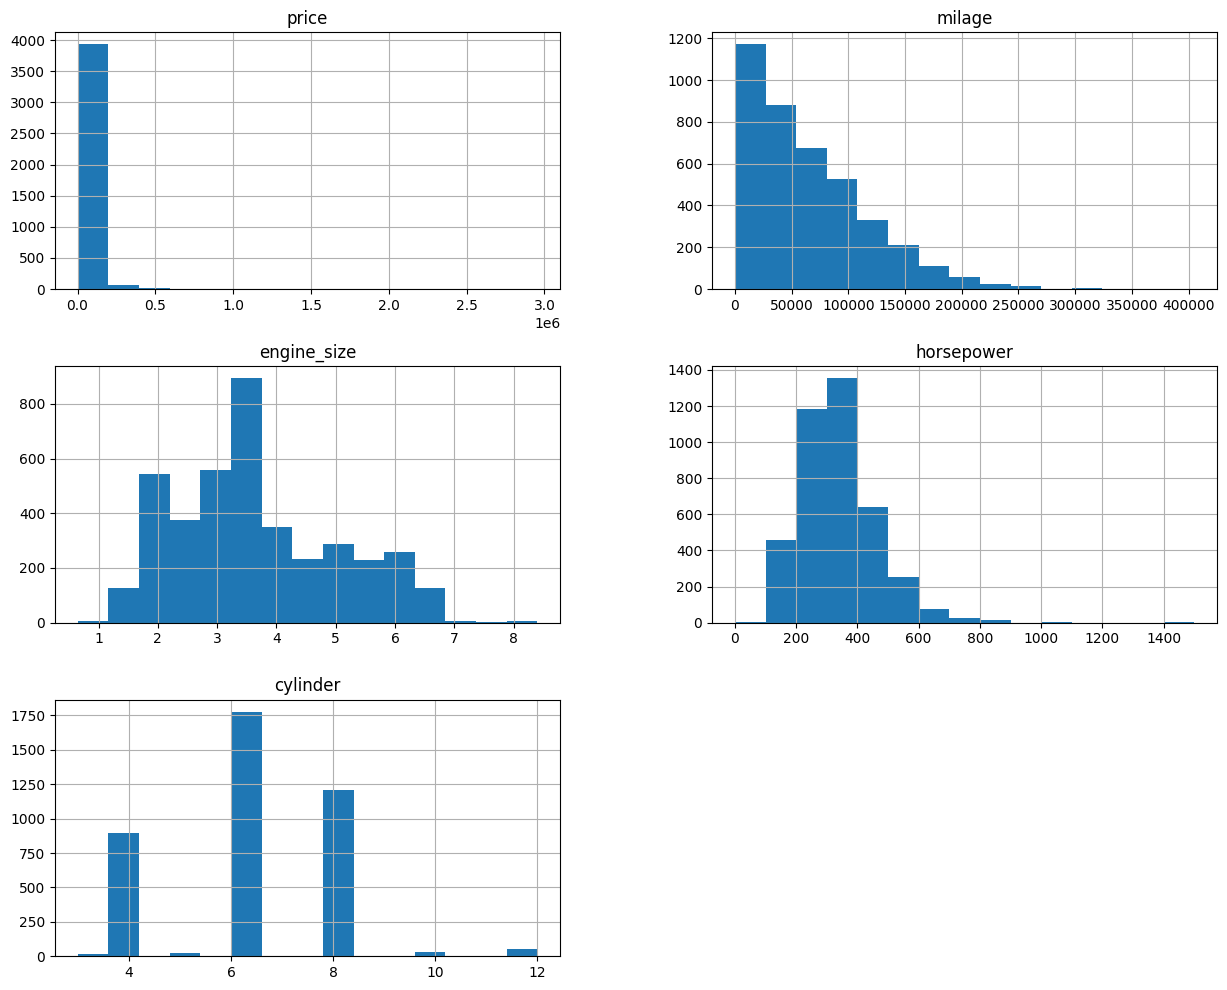

In [480]:
used_cars[['price', 'milage', 'engine_size', 'horsepower', 'cylinder']].hist(figsize=(15,12), bins=15)

In [481]:
used_cars['price_log']=np.log1p(used_cars['price'])

In [482]:
used_cars['price_log']

,price_log
0,9.239996
1,10.545499
2,10.907771
3,9.648660
4,10.463103
...,...
4004,12.765548
4005,10.894904
4006,11.418604
4007,11.050890


<Axes: >

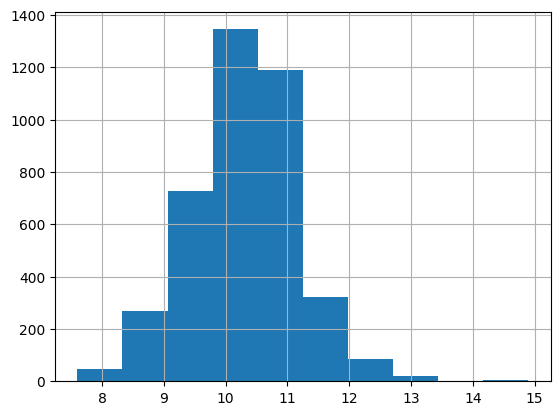

In [483]:
used_cars['price_log'].hist()

In [484]:
used_cars['milage_log']=np.log1p(used_cars['milage'])

<Axes: >

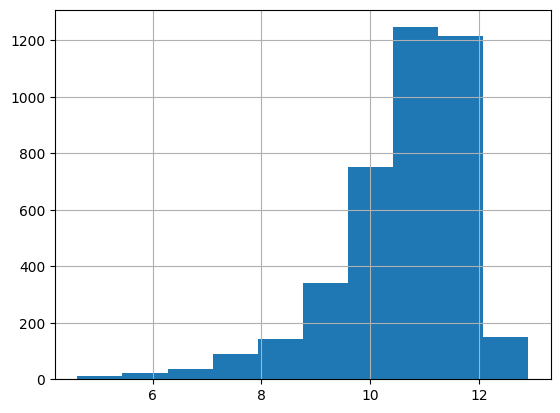

In [485]:
used_cars['milage_log'].hist()

In [486]:
used_cars=used_cars[(used_cars['engine_size']>=0) & (used_cars['engine_size']<=7)]

<Axes: >

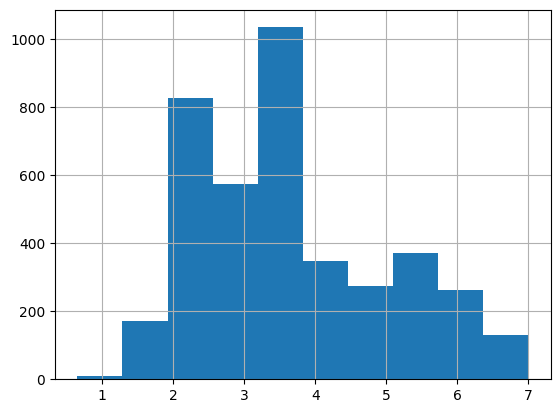

In [487]:
used_cars['engine_size'].hist()

<Axes: >

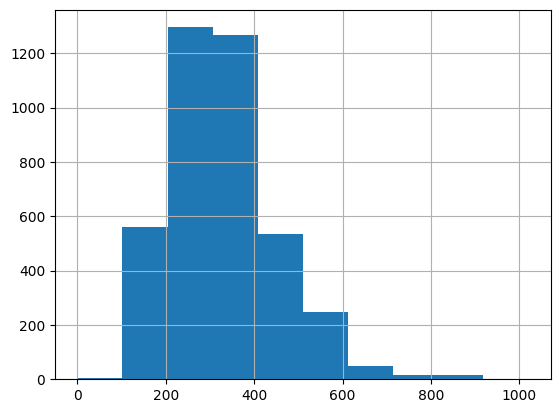

In [488]:
used_cars['horsepower'].hist()

In [489]:
upper_limit=used_cars['horsepower'].quantile(0.995)
used_cars=used_cars[(used_cars['horsepower']<upper_limit)]

In [490]:
used_cars['horsepower_log']=np.log1p(used_cars['horsepower'])

<Axes: >

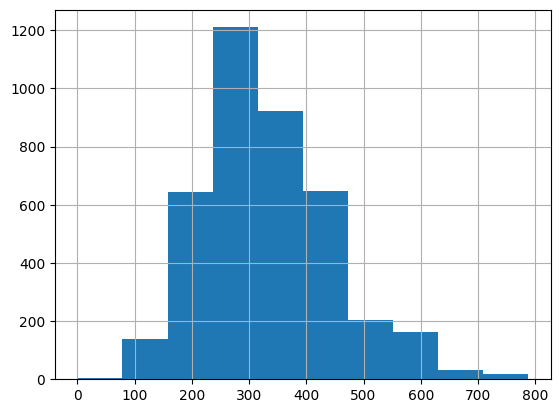

In [491]:
used_cars['horsepower'].hist()

In [492]:
used_cars=used_cars[(used_cars['cylinder']<8)]

<Axes: >

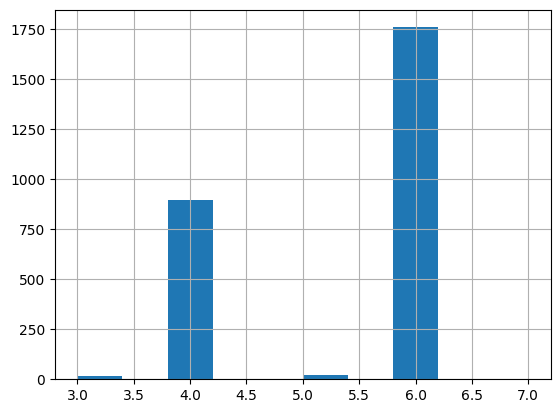

In [493]:
used_cars['cylinder'].hist()

In [494]:
used_cars['model_year'].describe()

,model_year
count,2693.000000
mean,2015.989231
std,5.834668
min,1974.000000
25%,2013.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [495]:
used_cars=used_cars[(used_cars['model_year']>=2000)]

In [496]:
used_cars['model_year'].describe()

,model_year
count,2656.000000
mean,2016.271837
std,5.333324
min,2000.000000
25%,2013.000000
50%,2018.000000
75%,2021.000000
max,2024.000000


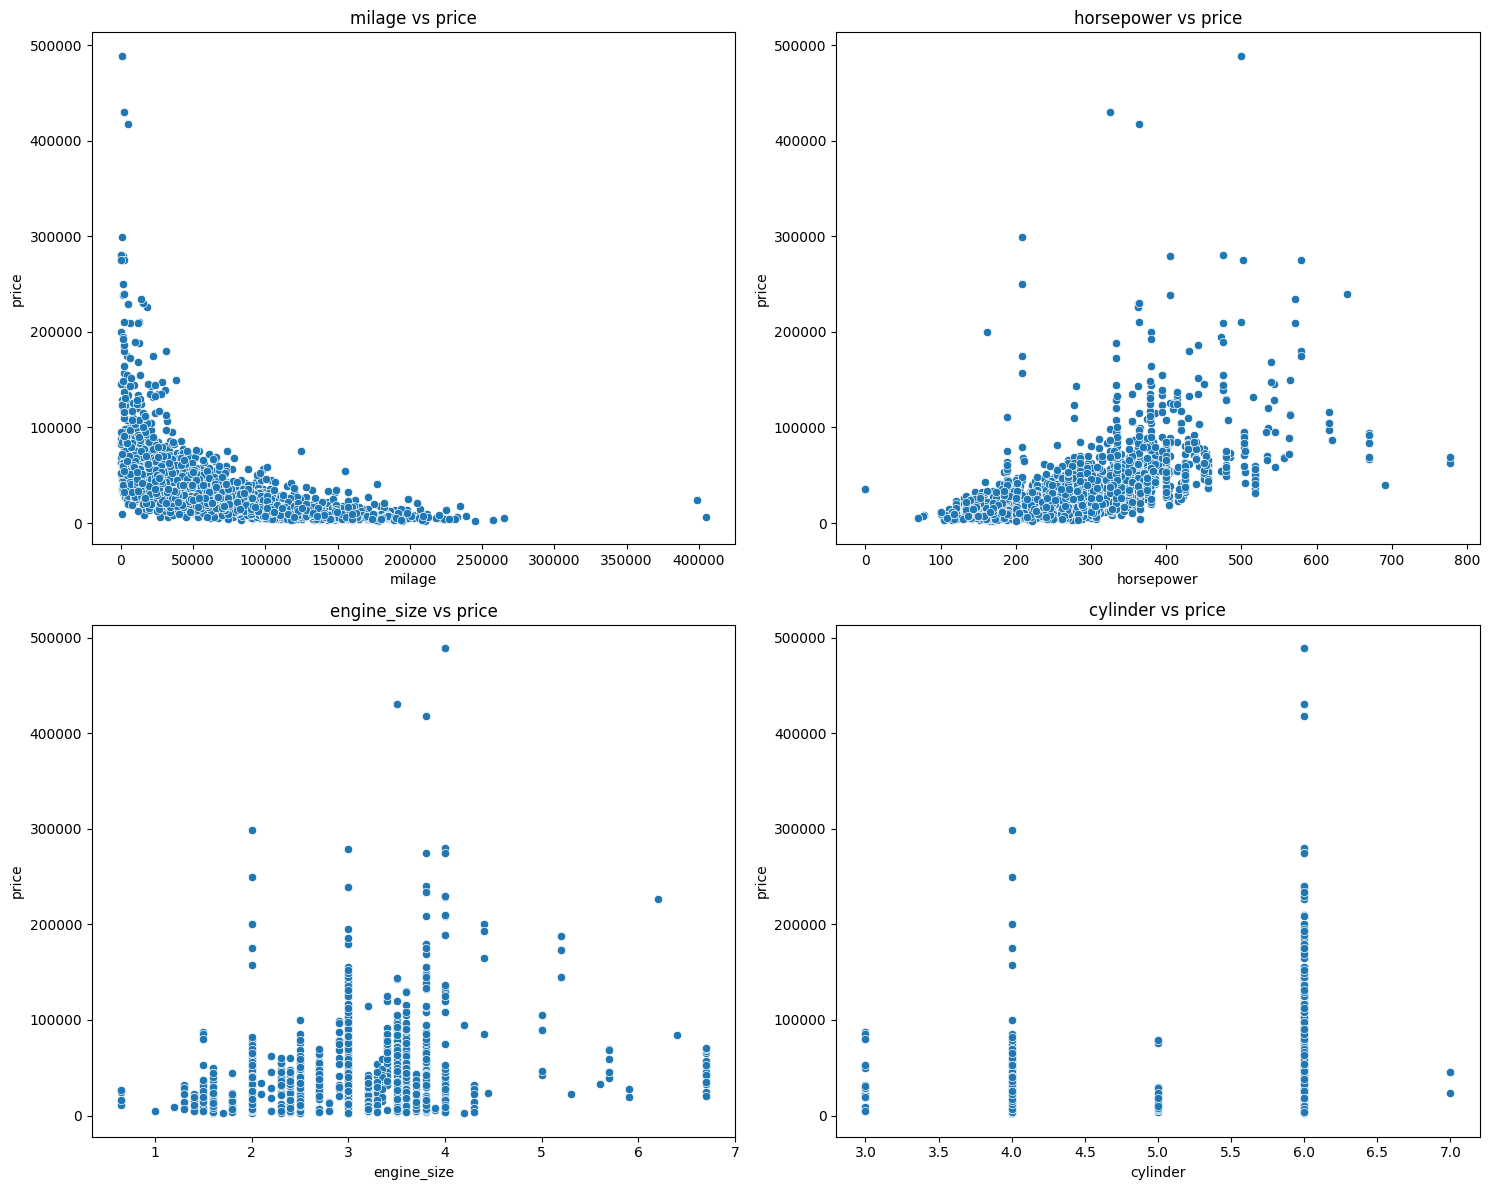

In [497]:
features=['milage', 'horsepower', 'engine_size', 'cylinder']
plt.figure(figsize=(15,12))
for i , feature in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.scatterplot(x=used_cars[feature], y=used_cars['price'], data=used_cars)
  plt.title(f'{feature} vs price')
  plt.xlabel(feature)
  plt.ylabel('price')
  plt.tight_layout()

# We contructed the scatterplots of all numerical features with respect to target(price) to find the dependency of price on all these numeric features.. So the conclusions that can be made are:  
# 1)- Milage vs Price- High prices can be spotted in cars having lower milage than 40000. the relation is non linear. Many cars have milage less than 100000. Some cars with milage as large as 400000 can be seen. Thus milage does affect the price with an negative slope.  
# 2)- Horsepower vs Price- Though there is high level of noise in the data but still a increasing order of slope can be witnessed. Clear upward trend. Certain luxury high HP cars shoot high prices.. many cars have 200, 300 and 400 HP engines.Thus horsepower is also also a strong predicting feature of price.  
# 3)- engine_size vs Price- This graph seem to be clustered enough... With each cluster, price varies drastically. 3L and 4L engine appear in both luxury and affordable cars. Thus engine_size is usedful but weeker than horsepower.  `
# 4)- Cylinder vs Price- Increases prices with increasing number of cylinders. Thus cylinder is a strong prediction feature.

###Price Correlatio  heatmap

Text(0.5, 1.0, 'Correlation between numeric features and  price')

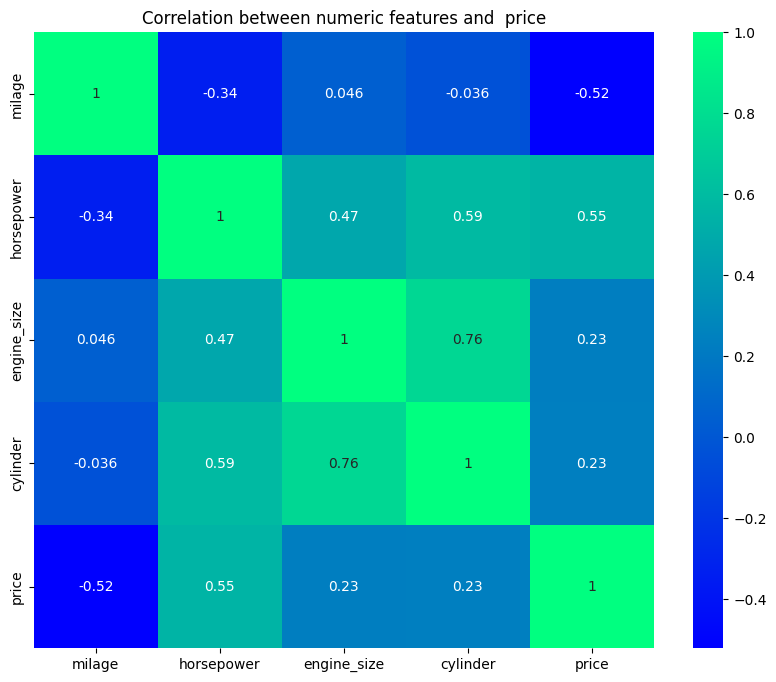

In [498]:
num_cols=used_cars[['milage', 'horsepower', 'engine_size', 'cylinder', 'price']]
corr=num_cols.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='winter')
plt.title('Correlation between numeric features and  price')

From the heatmap we can make some multicollinearity conclusion:  
Horsepower and cylinder are 59% correlated... generally  higher number of cylinder= higher horsepower  
engine size and cylinder are also show 76% correlation... which means very strong overlap condition. Bigger engine means more number of cylinders.

We can infer that engine_size and cylinder share same information.. thus if we train linear models.. we would have to drop one of them.


###Overall Conclusion
From the scatterplot anf heatmap the predictive power:
Milage(0.52)≈Horsepower(0.59)>Engine Size(0.23)≈Cylinder(0.23)


#####Time for Categorical Feature EDA

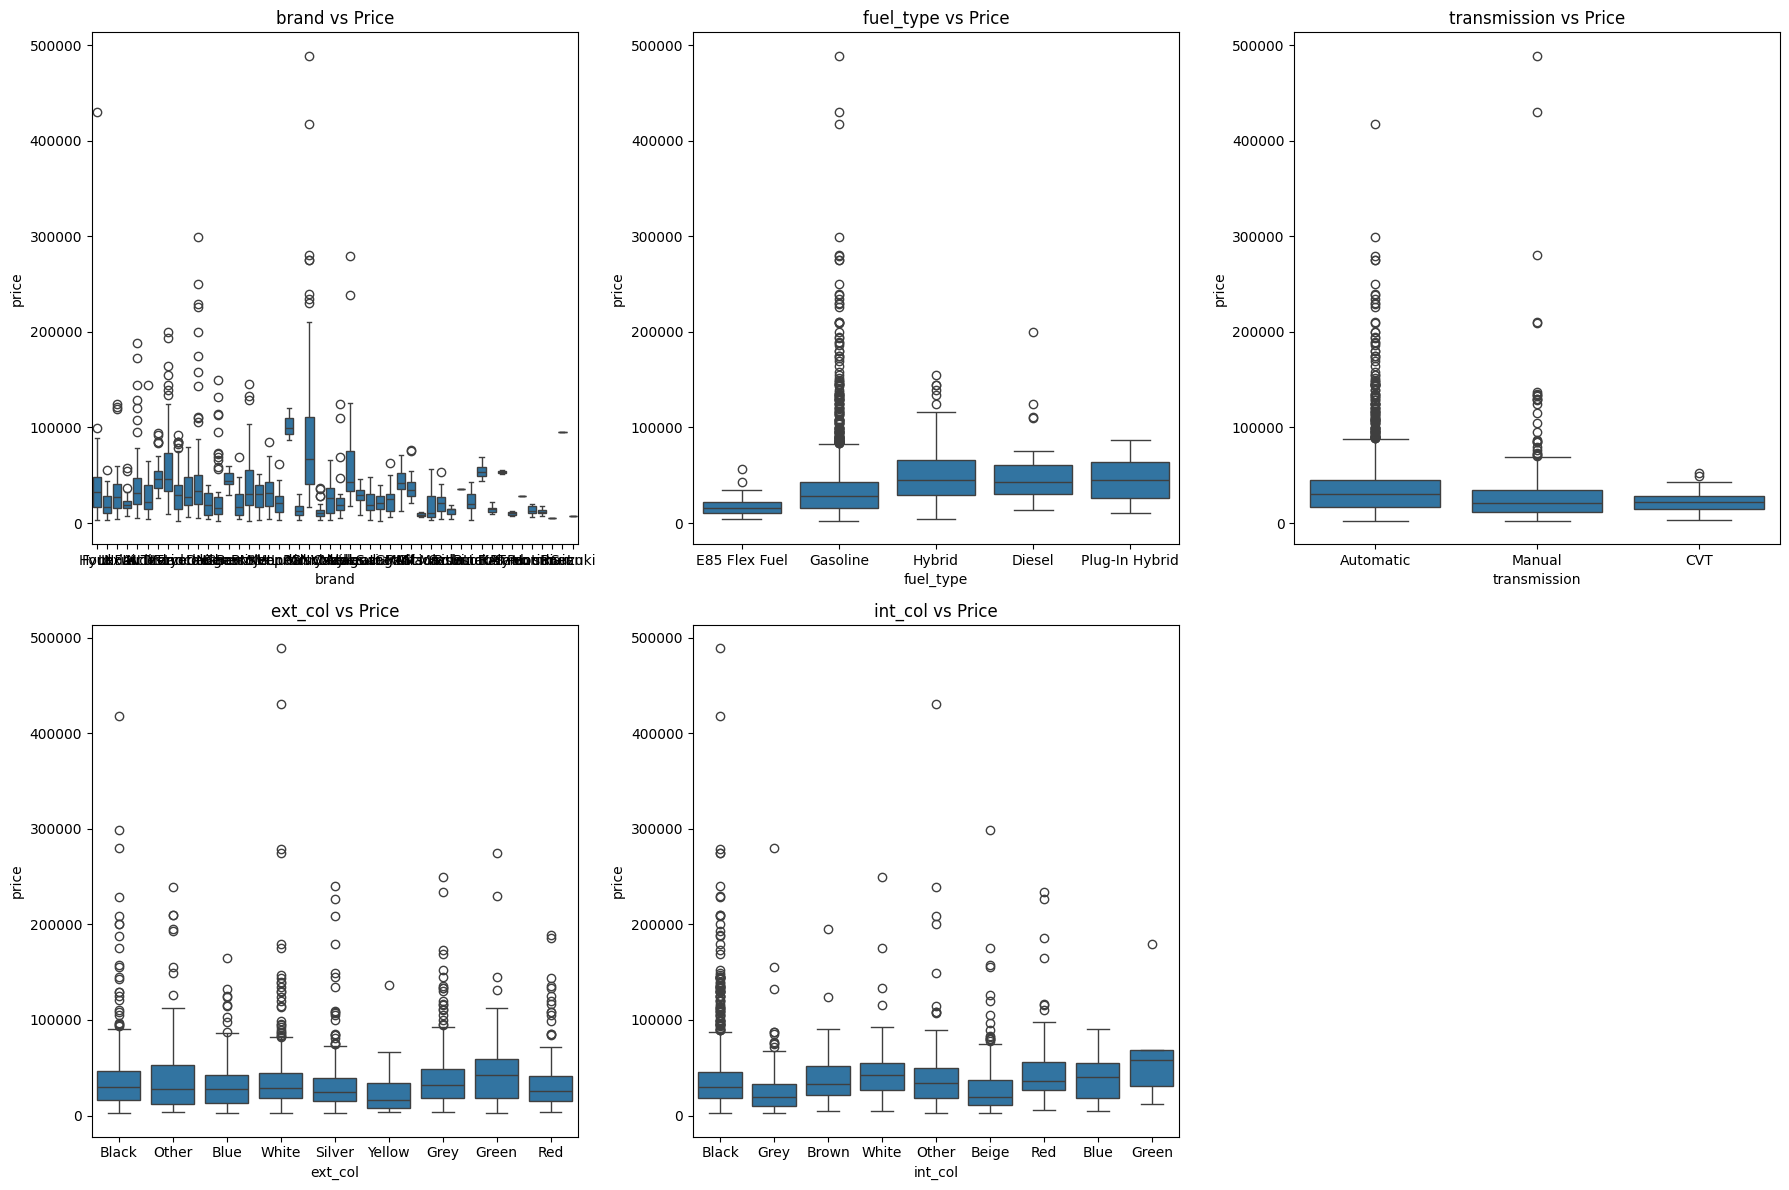

In [509]:
plt.figure(figsize=(18,12))
columns=used_cars.select_dtypes(include='object').columns
for i, column in enumerate(columns):
  plt.subplot(2,3, i+1)
  sns.boxplot(x=used_cars[column], y=used_cars['price'], data=used_cars)
  plt.title(f'{column} vs Price')
  plt.xlabel(column)
  plt.ylabel('price')
plt.tight_layout()

Conclusion from Categorical EDA boxplots:  
1)- Brand- one of the mostr strong predictors of price... Some luxury cars make extreme outliers. Affordable cars like honda, toyota, kia exist below 100000.  
2)-

In [514]:
used_cars['brand'].value_counts()

,count
brand,
BMW,272
Ford,239
Mercedes-Benz,185
Porsche,175
Audi,169
Toyota,153
Jeep,131
Lexus,94
Nissan,91
